<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/sentiment_arcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Arcs: Self-Supervising Time Series Sentiment Analysis**

## [MANUAL INPUT] Connect to Google gDrive 

In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


# **Setup and Configuration**

In [2]:
%cd /gdrive/MyDrive/research/2021/sentiment_arcs/

/gdrive/MyDrive/research/2021/sentiment_arcs


In [3]:
!ls

data				sentiment_arcs
nlp_sa_dl_novels_20211126.gdoc	sentiment_arcs_cruxes
nlp_sa_dl_novels.gdoc		sentiment_arcs_dataset
novels				sentiment_arcs_emotions
plots				sentiment_arcs_features
sa_time_series_20210912.gdoc	sentiment_arcs_segmentation


## Install Libraries

## Load Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import re
from datetime import datetime

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [7]:
plt.rcParams["figure.figsize"]=(20,10)

## Configure Jupyter Notebook

In [8]:
import warnings

warnings.filterwarnings('ignore')

# **Select Novels**

## Choose from Preexisting Corpus

In [9]:
novels_dt = {
  'cdickens_christmascarol':['A Christmas Carol by Charles Dickens ',1843,1399],
  'cdickens_greatexpectations':['Great Expectations by Charles Dickens' ,1861, 7230],
  'ddefoe_robinsoncrusoe':['Robinson Crusoe by Daniel Defoe',1719, 2280],
  'emforester_howardsend':['Howards End by E.M. Forester', 1910, 8999],
  'fbaum_wizardofoz':['The Wonderful Wizard of Oz by Frank Baum', 1850, 2238],
  'fdouglass_narrativeofslave':['Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass', 1845, 1688],
  'fscottfitzerald_greatgatsby':['The Great Gatsby by F. Scott Fitzgerald', 1925, 2950],
  'geliot_middlemarch':['Middlemarch by George Eliot', 1871, 10373],
  'hjames_portraitofalady':['The Portrait of a Lady by Henry James', 1881, 13258],
  'homerwilson_homer':['The Odyssey by Homer (trans Emily Wilson)', 2018, 6814],
  'imcewan_machineslikeme':['Machines Like Me by Ian McEwan', 2019, 6448],
  'jausten_prideandprejudice':['Pride and Prejudice by Jane Austen', 1813, 5891],
  'jconrad_heartofdarkness':['Heart of Darkness by Joseph Conrad', 1902, 1619],
  'jjoyce_portraitoftheartist':['A Portrait of the Artist as a Young Man by James Joyce', 2016, 5584],
  'jkrowling_pottersorcerersstone':['Harry Potter and the Sorcerer’s Stone by J.K. Rowling ', 1997, 5488],
  'mproust_searchoflosttime':['In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust', 1920, 8388],
  'mshelly_frankenstein':['Frankenstein by Mary Shelly', 1818, 3282],
  'mtwain_huckleberryfinn':['Huckleberry Finn by Mark Twain', 1884, 5775],
  'staugustine_confessions':['Confessions (Books 1-9) by St. Augustine', 400, 3673],
  'tmorrison_beloved':['Beloved by Toni Morrison', 1987, 7102],
  'vnabokov_palefire':['Pale Fire by Viktor Nabokov', 1962, 2984],
  'vwoolf_mrsdalloway':['Mrs. Dalloway by Virginia Woolf', 1925, 3647],
  'vwoolf_orlando':['Orlando by Virginia Woolf', 1928, 2,992],
  'vwoolf_thewaves':['The Waves by Virginia Woolf', 1931, 3919],
  'vwoolf_tothelighthouse':['To The Lighthouse by Virginia Woolf', 1927, 3403],
}

In [10]:
# Derive List of Novel a)keys and b)full author and titles

novels_key_ls = list(novels_dt.keys())
novels_key_ls

novels_full_ls = [x[0] for x in list(novels_dt.values())]

for akey in novels_full_ls:
  print(akey)

A Christmas Carol by Charles Dickens 
Great Expectations by Charles Dickens
Robinson Crusoe by Daniel Defoe
Howards End by E.M. Forester
The Wonderful Wizard of Oz by Frank Baum
Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass
The Great Gatsby by F. Scott Fitzgerald
Middlemarch by George Eliot
The Portrait of a Lady by Henry James
The Odyssey by Homer (trans Emily Wilson)
Machines Like Me by Ian McEwan
Pride and Prejudice by Jane Austen
Heart of Darkness by Joseph Conrad
A Portrait of the Artist as a Young Man by James Joyce
Harry Potter and the Sorcerer’s Stone by J.K. Rowling 
In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust
Frankenstein by Mary Shelly
Huckleberry Finn by Mark Twain
Confessions (Books 1-9) by St. Augustine
Beloved by Toni Morrison
Pale Fire by Viktor Nabokov
Mrs. Dalloway by Virginia Woolf
Orlando by Virginia Woolf
The Waves by Virginia Woolf
To The Lighthouse by Virginia Woolf


In [11]:
for akey in novels_key_ls:
  print(akey)

cdickens_christmascarol
cdickens_greatexpectations
ddefoe_robinsoncrusoe
emforester_howardsend
fbaum_wizardofoz
fdouglass_narrativeofslave
fscottfitzerald_greatgatsby
geliot_middlemarch
hjames_portraitofalady
homerwilson_homer
imcewan_machineslikeme
jausten_prideandprejudice
jconrad_heartofdarkness
jjoyce_portraitoftheartist
jkrowling_pottersorcerersstone
mproust_searchoflosttime
mshelly_frankenstein
mtwain_huckleberryfinn
staugustine_confessions
tmorrison_beloved
vnabokov_palefire
vwoolf_mrsdalloway
vwoolf_orlando
vwoolf_thewaves
vwoolf_tothelighthouse


In [12]:
#@title Select Which Novel(s) you want to Analyze:

cdickens_christmascarol = True #@param {type:"boolean"}
cdickens_greatexpectations = True #@param {type:"boolean"}
ddefoe_robinsoncrusoe = True #@param {type:"boolean"}
emforester_howardsend = True #@param {type:"boolean"}
fbaum_wizardofoz = True #@param {type:"boolean"}
fdouglass_narrativeofslave = True #@param {type:"boolean"}
fscottfitzerald_greatgatsby = True #@param {type:"boolean"}
geliot_middlemarch = True #@param {type:"boolean"}
hjames_portraitofalady = True #@param {type:"boolean"}
homerwilson_homer = True #@param {type:"boolean"}
imcewan_machineslikeme = True #@param {type:"boolean"}
jausten_prideandprejudice = True #@param {type:"boolean"}
jconrad_heartofdarkness = True #@param {type:"boolean"}
jjoyce_portraitoftheartist = True #@param {type:"boolean"}
jkrowling_pottersorcerersstone = True #@param {type:"boolean"}
mproust_searchoflosttime = True #@param {type:"boolean"}
mshelly_frankenstein = True #@param {type:"boolean"}
mtwain_huckleberryfinn = True #@param {type:"boolean"}
staugustine_confessions = True #@param {type:"boolean"}
tmorrison_beloved = True #@param {type:"boolean"}
vnabokov_palefire = True #@param {type:"boolean"}
vwoolf_mrsdalloway = True #@param {type:"boolean"}
vwoolf_orlando = True #@param {type:"boolean"}
vwoolf_thewaves = True #@param {type:"boolean"}
vwoolf_tothelighthouse = True #@param {type:"boolean"}

novels_ls = []

if cdickens_christmascarol:
  novels_ls.append('cdickens_christmascarol')
if cdickens_greatexpectations: 
  novels_ls.append('cdickens_greatexpectations')
if ddefoe_robinsoncrusoe:
  novels_ls.append('ddefoe_robinsoncrusoe')
if emforester_howardsend:
  novels_ls.append('emforester_howardsend')
if fbaum_wizardofoz:
  novels_ls.append('fbaum_wizardofoz')
if fdouglass_narrativeofslave:
  novels_ls.append('fdouglass_narrativeofslave')
if fscottfitzerald_greatgatsby:
  novels_ls.append('fscottfitzerald_greatgatsby')
if geliot_middlemarch:
  novels_ls.append('geliot_middlemarch')
if hjames_portraitofalady:
  novels_ls.append('hjames_portraitofalady')
if homerwilson_homer:
  novels_ls.append('homerwilson_homer')
if imcewan_machineslikeme:
  novels_ls.append('imcewan_machineslikeme')
if jausten_prideandprejudice:
  novels_ls.append('jausten_prideandprejudice')
if jconrad_heartofdarkness:
  novels_ls.append('jconrad_heartofdarkness')
if jjoyce_portraitoftheartist:
  novels_ls.append('jjoyce_portraitoftheartist')
if jkrowling_pottersorcerersstone:
  novels_ls.append('jkrowling_pottersorcerersstone')
if mproust_searchoflosttime:
  novels_ls.append('mproust_searchoflosttime')
if mshelly_frankenstein:
  novels_ls.append('mshelly_frankenstein')
if mtwain_huckleberryfinn:
  novels_ls.append('mtwain_huckleberryfinn')
if staugustine_confessions:
  novels_ls.append('staugustine_confessions')
if tmorrison_beloved:
  novels_ls.append('tmorrison_beloved')
if vnabokov_palefire:
  novels_ls.append('vnabokov_palefire')
if vwoolf_mrsdalloway:
  novels_ls.append('vwoolf_mrsdalloway')
if vwoolf_orlando:
  novels_ls.append('vwoolf_orlando')
if vwoolf_thewaves:
  novels_ls.append('vwoolf_thewaves')
if vwoolf_tothelighthouse:
  novels_ls.append('vwoolf_tothelighthouse')


In [13]:
# Confirm Novel Selection(s)

print(f'Confirm these are the Novels you want to analyze:\n')

for i, anovel in enumerate(novels_ls):
  print(f'  Novel #{i}: {novels_dt[anovel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Novels you want to analyze:

  Novel #0: A Christmas Carol by Charles Dickens 
  Novel #1: Great Expectations by Charles Dickens
  Novel #2: Robinson Crusoe by Daniel Defoe
  Novel #3: Howards End by E.M. Forester
  Novel #4: The Wonderful Wizard of Oz by Frank Baum
  Novel #5: Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass
  Novel #6: The Great Gatsby by F. Scott Fitzgerald
  Novel #7: Middlemarch by George Eliot
  Novel #8: The Portrait of a Lady by Henry James
  Novel #9: The Odyssey by Homer (trans Emily Wilson)
  Novel #10: Machines Like Me by Ian McEwan
  Novel #11: Pride and Prejudice by Jane Austen
  Novel #12: Heart of Darkness by Joseph Conrad
  Novel #13: A Portrait of the Artist as a Young Man by James Joyce
  Novel #14: Harry Potter and the Sorcerer’s Stone by J.K. Rowling 
  Novel #15: In Search of Lost Time, Vol 3: The Guermantes Way by Marcel Proust
  Novel #16: Frankenstein by Mary Shelly
  Novel #17: Hucklebe

In [14]:
#@title Enter ONE Novel key to test:

Novel_Key = "vwoolf_tothelighthouse" #@param {type:"string"}

novels_ls = [Novel_Key]

Novel_Title = novels_dt[novels_ls[0]]
Novel_Title

['To The Lighthouse by Virginia Woolf', 1927, 3403]

## Upload New Novel

In [ ]:
# TODO: Coming feature

# **Select Sentiment Analysis Models**

In [107]:
cols_map_dt = {'syuzhet':'syuzhetr',
               'huliu':'bing_sentimentr',
               'sentiword':'sentiword_sentimentr',
               'senticnet':'senticnet_sentimentr',
               'lmcd':'lmcd_sentimentr',
               'jockers':'jockers_sentimentr',
               'jockers_rinker':'jockersrinker_sentimentr'
               }

cols_missing_ls = ['nrc_sentimentr']

In [52]:
models_dt = {
    # Lexicon
    'SyuzhetR_AFINN':['afinn', 'lexicon', 2477],
    'SyuzhetR_Bing':['bing', 'lexicon', 5469],
    'SyuzhetR_NRC':['nrc', 'lexicon', 5468],
    'SyuzhetR_SyuzhetR':['syuzhetr', 'lexicon', 10748],
    'SentimentR_SentimentR':['sentimentr', 'lexicon', 11710],
    'Pattern':['pattern', 'lexicon', 2918],

    # Heuristic
    'VADER':['vader', 'heuristic', 7520],
    'SentimentR_Bing':['bing_sentimentr', 'heuristic', 5469],
    # 'SentimentR_NRC':['nrc_sentimentr', 'heuristic', 5469],
    'SentimentR_SentiWord':['sentiword_sentimentr', 'heuristic', 20093],
    'SentimentR_SenticNet':['senticnet_sentimentr', 'heuristic', 23626],
    'SentimentR_LMcD':['lmcd_sentimentr', 'heuristic', 4150],
    'SentimentR_Jockers':['jockers_sentimentr', 'heuristic', 10748],
    'SentimentR_JockersRinker':['jockersrinker_sentimentr', 'heuristic', 11710],

    # Traditional ML 
    'Logistic_Regression':['logreg', 'tradml', 'scikit'],
    'Logistic_Regression_CV':['logreg_cv', 'tradml', 'scikit'],
    'Multinomial_Naive_Bayes':['multinb', 'tradml', 'scikit'],
    'TextBlob':['textblob', 'tradml', 'textblob'],
    'Random_Forest':['rf', 'tradml', 'scikit'],
    'XGBoost':['xgb', 'tradml', 'xgboost'],
    'FLAML_AutoML':['flaml', 'tradml', 'flaml'],
    'AutoGluon_Text':['autogluon', 'tradml', 'autogluon_text'],

    # DNN
    'Fully_Connected_Network':['fcn', 'dnn', 6287671],
    'LSTM_DNN':['lstm', 'dnn', 7109089],
    'CNN_DNN':['cnn', 'dnn', 1315937],
    'Multilingual_CNN_Stanza_AutoML':['stanza', 'dnn', 0],
    'HyperOpt_CNN_Flair_AutoML':['flair', 'dnn', 0],

    # Transformer
    'Distilled_BERT':['huggingface', 'transformer', 'bert'],
    'T5_IMDB':['t5imdb50k', 'transformer', 't5'],
    'BERT_Dual_Coding':['hinglish', 'transformer', 'bert'],
    'BERT_Yelp':['yelp', 'transformer', 'bert'],
    'BERT_2IMDB':['imdb2way', 'transformer', 'bert'],
    'BERT_Multilingual':['nlptown', 'transformer', 'bert'],
    'RoBERTa_XML_8Language':['robertaxml8lang', 'transformer', 'roberta'],
    'RoBERTa_Large_15DB':['roberta15lg', 'transformer', 'roberta'],

}

In [53]:
# Convience lists for each type of model

# Lexicon Models
models_lexicon_ls = [x[0] for x in models_dt.values() if x[1] == 'lexicon']
print(f'\nThere are {len(models_lexicon_ls)} Lexicon Models')
for i,amodel in enumerate(models_lexicon_ls):
  print(f'  Lexicon Model #{i}: {amodel}')

# Heuristic Models
models_heuristic_ls = [x[0] for x in models_dt.values() if x[1] == 'heuristic']
print(f'\nThere are {len(models_heuristic_ls)} Heuristic Models')
for i,amodel in enumerate(models_heuristic_ls):
  print(f'  Heuristic Model #{i}: {amodel}')

# Traditional ML Models
models_tradml_ls = [x[0] for x in models_dt.values() if x[1] == 'tradml']
print(f'\nThere are {len(models_tradml_ls)} Traditional ML Models')
for i,amodel in enumerate(models_tradml_ls):
  print(f'  Traditional ML Model #{i}: {amodel}')

# DNN Models
models_dnn_ls = [x[0] for x in models_dt.values() if x[1] == 'dnn']
print(f'\nThere are {len(models_dnn_ls)} DNN Models')
for i,amodel in enumerate(models_dnn_ls):
  print(f'  DNN Model #{i}: {amodel}')

# Transformer Models
models_transformer_ls = [x[0] for x in models_dt.values() if x[1] == 'transformer']
print(f'\nThere are {len(models_transformer_ls)} Transformer Models')
for i,amodel in enumerate(models_transformer_ls):
  print(f'  Transformer Model #{i}: {amodel}')


There are 6 Lexicon Models
  Lexicon Model #0: afinn
  Lexicon Model #1: bing
  Lexicon Model #2: nrc
  Lexicon Model #3: syuzhetr
  Lexicon Model #4: sentimentr
  Lexicon Model #5: pattern

There are 7 Heuristic Models
  Heuristic Model #0: vader
  Heuristic Model #1: bing_sentimentr
  Heuristic Model #2: sentiword_sentimentr
  Heuristic Model #3: senticnet_sentimentr
  Heuristic Model #4: lmcd_sentimentr
  Heuristic Model #5: jockers_sentimentr
  Heuristic Model #6: jockersrinker_sentimentr

There are 8 Traditional ML Models
  Traditional ML Model #0: logreg
  Traditional ML Model #1: logreg_cv
  Traditional ML Model #2: multinb
  Traditional ML Model #3: textblob
  Traditional ML Model #4: rf
  Traditional ML Model #5: xgb
  Traditional ML Model #6: flaml
  Traditional ML Model #7: autogluon

There are 5 DNN Models
  DNN Model #0: fcn
  DNN Model #1: lstm
  DNN Model #2: cnn
  DNN Model #3: stanza
  DNN Model #4: flair

There are 8 Transformer Models
  Transformer Model #0: hugging

## Lexical Models

In [55]:
#@title Select Lexical Model(s) to Include in Ensemble:

SyzuhetR_AFINN = True #@param {type:"boolean"}
SyuzhetR_Bing = True #@param {type:"boolean"}
SyuzhetR_NRC = True #@param {type:"boolean"}
SyuzhetR_SyuzhetR = True #@param {type:"boolean"}
SentimentR_SentimentR = True #@param {type:"boolean"}
Pattern = True #@param {type:"boolean"}


ensemble_lexicon_ls = []

if SyzuhetR_AFINN:
  ensemble_lexicon_ls.append('SyuzhetR_AFINN')
if SyuzhetR_Bing:
  ensemble_lexicon_ls.append('SyuzhetR_Bing')
if SyuzhetR_NRC:
  ensemble_lexicon_ls.append('SyuzhetR_NRC')
if SyuzhetR_SyuzhetR:
  ensemble_lexicon_ls.append('SyuzhetR_SyuzhetR')
if SentimentR_SentimentR:
  ensemble_lexicon_ls.append('SentimentR_SentimentR')
if Pattern:
  ensemble_lexicon_ls.append('Pattern')


ensemble_lexicon_ls

['SyuzhetR_AFINN',
 'SyuzhetR_Bing',
 'SyuzhetR_NRC',
 'SyuzhetR_SyuzhetR',
 'SentimentR_SentimentR',
 'Pattern']

In [56]:
# Confirm Lexicon Model Selection(s)

print(f'Confirm these are the Lexicon Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_lexicon_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Lexicon Model(s) to include in the Ensemble:

  Model #0: afinn
  Model #1: bing
  Model #2: nrc
  Model #3: syuzhetr
  Model #4: sentimentr
  Model #5: pattern

If there is an error, go back and rerun the previous code cell.


## Heuristic Models

In [57]:
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'heuristic']:
  print(amodel)

VADER
SentimentR_Bing
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_Jockers
SentimentR_JockersRinker


In [58]:
for amodel in models_heuristic_ls:
  print(amodel)

vader
bing_sentimentr
sentiword_sentimentr
senticnet_sentimentr
lmcd_sentimentr
jockers_sentimentr
jockersrinker_sentimentr


In [59]:
#@title Select Heuristic Model(s) to Include in Ensemble:

VADER = True #@param {type:"boolean"}
SentimentR_Bing = True #@param {type:"boolean"}
# SentimentR_NRC = True #@param {type:"boolean"}
SentimentR_SentiWord = True #@param {type:"boolean"}
SentimentR_SenticNet = True #@param {type:"boolean"}
SentimentR_LMcD = True #@param {type:"boolean"}
SentimentR_Jockers = True #@param {type:"boolean"}
SentimentR_JockersRinker = True #@param {type:"boolean"}


ensemble_heuristic_ls = []

if VADER:
  ensemble_heuristic_ls.append('VADER')
if SentimentR_Bing:
  ensemble_heuristic_ls.append('SentimentR_Bing')

# if SentimentR_NRC:
#   ensemble_heuristic_ls.append('SentimentR_NRC')

if SentimentR_SentiWord:
  ensemble_heuristic_ls.append('SentimentR_SentiWord')
if SentimentR_SenticNet:
  ensemble_heuristic_ls.append('SentimentR_SenticNet')
if SentimentR_LMcD:
  ensemble_heuristic_ls.append('SentimentR_LMcD')
if SentimentR_Jockers:
  ensemble_heuristic_ls.append('SentimentR_Jockers')
if SentimentR_JockersRinker:
  ensemble_heuristic_ls.append('SentimentR_JockersRinker')

ensemble_heuristic_ls

['VADER',
 'SentimentR_Bing',
 'SentimentR_SentiWord',
 'SentimentR_SenticNet',
 'SentimentR_LMcD',
 'SentimentR_Jockers',
 'SentimentR_JockersRinker']

In [60]:
# Confirm Heuristic Model Selection(s)

print(f'Confirm these are the Heuristic Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_heuristic_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Heuristic Model(s) to include in the Ensemble:

  Model #0: vader
  Model #1: bing_sentimentr
  Model #2: sentiword_sentimentr
  Model #3: senticnet_sentimentr
  Model #4: lmcd_sentimentr
  Model #5: jockers_sentimentr
  Model #6: jockersrinker_sentimentr

If there is an error, go back and rerun the previous code cell.


## Traditional ML Models

In [61]:
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'tradml']:
  print(amodel)

Logistic_Regression
Logistic_Regression_CV
Multinomial_Naive_Bayes
TextBlob
Random_Forest
XGBoost
FLAML_AutoML
AutoGluon_Text


In [62]:
for amodel in models_tradml_ls:
  print(amodel)

logreg
logreg_cv
multinb
textblob
rf
xgb
flaml
autogluon


In [63]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Logistic_Regression = True #@param {type:"boolean"}
Logistic_Regression_CV6 = True #@param {type:"boolean"}
Multinomial_Naive_Bayes = True #@param {type:"boolean"}
TextBlob = True #@param {type:"boolean"}
Random_Forest = True #@param {type:"boolean"}
XGBoost = True #@param {type:"boolean"}
FLAML_AutoML = True #@param {type:"boolean"}
AutoGluon_Text = True #@param {type:"boolean"}


ensemble_tradml_ls = []

if Logistic_Regression:
  ensemble_tradml_ls.append('Logistic_Regression')
if Logistic_Regression_CV6:
  ensemble_tradml_ls.append('Logistic_Regression_CV')
if Multinomial_Naive_Bayes:
  ensemble_tradml_ls.append('Multinomial_Naive_Bayes')
if TextBlob:
  ensemble_tradml_ls.append('TextBlob')
if Random_Forest:
  ensemble_tradml_ls.append('Random_Forest')
if XGBoost:
  ensemble_tradml_ls.append('XGBoost')
if FLAML_AutoML:
  ensemble_tradml_ls.append('FLAML_AutoML')
if AutoGluon_Text:
  ensemble_tradml_ls.append('AutoGluon_Text')

ensemble_tradml_ls

['Logistic_Regression',
 'Logistic_Regression_CV',
 'Multinomial_Naive_Bayes',
 'TextBlob',
 'Random_Forest',
 'XGBoost',
 'FLAML_AutoML',
 'AutoGluon_Text']

In [64]:
# Confirm Traditional ML Model Selection(s)

print(f'Confirm these are the Traditional ML Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_tradml_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Traditional ML Model(s) to include in the Ensemble:

  Model #0: logreg
  Model #1: logreg_cv
  Model #2: multinb
  Model #3: textblob
  Model #4: rf
  Model #5: xgb
  Model #6: flaml
  Model #7: autogluon

If there is an error, go back and rerun the previous code cell.


## DNN Models

In [65]:
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'dnn']:
  print(amodel)

Fully_Connected_Network
LSTM_DNN
CNN_DNN
Multilingual_CNN_Stanza_AutoML
HyperOpt_CNN_Flair_AutoML


In [66]:
for amodel in models_dnn_ls:
  print(amodel)

fcn
lstm
cnn
stanza
flair


In [67]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Fully_Connected_Network = True #@param {type:"boolean"}
LSTM_DNN = True #@param {type:"boolean"}
CNN_DNN = True #@param {type:"boolean"}
Multilingual_CNN_Stanza_AutoML = True #@param {type:"boolean"}
HyperOpt_CNN_Flair_AutoML = True #@param {type:"boolean"}


ensemble_dnn_ls = []

if Fully_Connected_Network:
  ensemble_dnn_ls.append('Fully_Connected_Network')
if LSTM_DNN:
  ensemble_dnn_ls.append('LSTM_DNN')
if CNN_DNN:
  ensemble_dnn_ls.append('CNN_DNN')
if Multilingual_CNN_Stanza_AutoML:
  ensemble_dnn_ls.append('Multilingual_CNN_Stanza_AutoML')
if HyperOpt_CNN_Flair_AutoML:
  ensemble_dnn_ls.append('HyperOpt_CNN_Flair_AutoML')

ensemble_dnn_ls

['Fully_Connected_Network',
 'LSTM_DNN',
 'CNN_DNN',
 'Multilingual_CNN_Stanza_AutoML',
 'HyperOpt_CNN_Flair_AutoML']

In [68]:
# Confirm DNN Model Selection(s)

print(f'Confirm these are the DNN Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_dnn_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the DNN Model(s) to include in the Ensemble:

  Model #0: fcn
  Model #1: lstm
  Model #2: cnn
  Model #3: stanza
  Model #4: flair

If there is an error, go back and rerun the previous code cell.


## Transformer Models

In [69]:
for amodel in [x for x in models_dt.keys() if models_dt[x][1] == 'transformer']:
  print(amodel)

Distilled_BERT
T5_IMDB
BERT_Dual_Coding
BERT_Yelp
BERT_2IMDB
BERT_Multilingual
RoBERTa_XML_8Language
RoBERTa_Large_15DB


In [70]:
for amodel in models_transformer_ls:
  print(amodel)

huggingface
t5imdb50k
hinglish
yelp
imdb2way
nlptown
robertaxml8lang
roberta15lg


In [71]:
#@title Select Heuristic Model(s) to Include in Ensemble:

Distilled_BERT = True #@param {type:"boolean"}
T5_IMDB = True #@param {type:"boolean"}
BERT_Dual_Coding = True #@param {type:"boolean"}
BERT_Yelp = True #@param {type:"boolean"}
BERT_2IMDB = True #@param {type:"boolean"}
BERT_Multilingual = True #@param {type:"boolean"}
RoBERTa_XML_8Language = True #@param {type:"boolean"}
RoBERTa_Large_15DB = True #@param {type:"boolean"}


ensemble_transformer_ls = []

if Distilled_BERT:
  ensemble_transformer_ls.append('Distilled_BERT')
if T5_IMDB:
  ensemble_transformer_ls.append('T5_IMDB')
if BERT_Dual_Coding:
  ensemble_transformer_ls.append('BERT_Dual_Coding')
if BERT_Yelp:
  ensemble_transformer_ls.append('BERT_Yelp')
if BERT_2IMDB:
  ensemble_transformer_ls.append('BERT_2IMDB')
if BERT_Multilingual:
  ensemble_transformer_ls.append('BERT_Multilingual')
if RoBERTa_XML_8Language:
  ensemble_transformer_ls.append('RoBERTa_XML_8Language')
if RoBERTa_Large_15DB:
  ensemble_transformer_ls.append('RoBERTa_Large_15DB')

ensemble_transformer_ls

['Distilled_BERT',
 'T5_IMDB',
 'BERT_Dual_Coding',
 'BERT_Yelp',
 'BERT_2IMDB',
 'BERT_Multilingual',
 'RoBERTa_XML_8Language',
 'RoBERTa_Large_15DB']

In [72]:
# Confirm Transformer Model Selection(s)

print(f'Confirm these are the Transformer Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_transformer_ls):
  print(f'  Model #{i}: {models_dt[amodel][0]}')

print('\nIf there is an error, go back and rerun the previous code cell.')

Confirm these are the Transformer Model(s) to include in the Ensemble:

  Model #0: huggingface
  Model #1: t5imdb50k
  Model #2: hinglish
  Model #3: yelp
  Model #4: imdb2way
  Model #5: nlptown
  Model #6: robertaxml8lang
  Model #7: roberta15lg

If there is an error, go back and rerun the previous code cell.


## Review Model Selection(s):

In [73]:
ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
              ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_ls):
  print(f'  Model #{i}: {amodel} ({models_dt[amodel][1]})')

print(f'\nIf there is an error in these {len(ensemble_ls)} models, \n go back and rerun the previous code cells.')

Confirm these are the all the Model(s) to include in the Ensemble:

  Model #0: SyuzhetR_AFINN (lexicon)
  Model #1: SyuzhetR_Bing (lexicon)
  Model #2: SyuzhetR_NRC (lexicon)
  Model #3: SyuzhetR_SyuzhetR (lexicon)
  Model #4: SentimentR_SentimentR (lexicon)
  Model #5: Pattern (lexicon)
  Model #6: VADER (heuristic)
  Model #7: SentimentR_Bing (heuristic)
  Model #8: SentimentR_SentiWord (heuristic)
  Model #9: SentimentR_SenticNet (heuristic)
  Model #10: SentimentR_LMcD (heuristic)
  Model #11: SentimentR_Jockers (heuristic)
  Model #12: SentimentR_JockersRinker (heuristic)
  Model #13: Logistic_Regression (tradml)
  Model #14: Logistic_Regression_CV (tradml)
  Model #15: Multinomial_Naive_Bayes (tradml)
  Model #16: TextBlob (tradml)
  Model #17: Random_Forest (tradml)
  Model #18: XGBoost (tradml)
  Model #19: FLAML_AutoML (tradml)
  Model #20: AutoGluon_Text (tradml)
  Model #21: Fully_Connected_Network (dnn)
  Model #22: LSTM_DNN (dnn)
  Model #23: CNN_DNN (dnn)
  Model #24: Mu

# **Get Sentiment Values**

## Option (a): Read Clean Values All Together

In [43]:
!pwd

/gdrive/MyDrive/research/2021/sentiment_arcs


In [44]:
!ls ./data/sentiments_clean | wc -l

109


In [ ]:
!ls ./data/sentiments_clean/*.csv

In [108]:
# ensemble_df = pd.read_csv('./data/sentiments_raw/models_all_vwoolf_tothelighthouse.csv', index_col=[0])

ensemble_df = pd.read_csv('./data/sentiments_clean/models_allz_vwoolf_tothelighthouse.csv', index_col=[0])

ensemble_df.head()

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,huggingface_z,pattern_z,t5imdb50k_z,rf_z,robertaxml8lang_z,flaml_z,jockers_z,vader_z,cnn_z,lmcd_z,stanza_z,jockers_rinker_z,textblob_z,imdb2way_z,senticnet_z,logreg_z,huliu_z,hinglish_z,fcn_z,logreg_cv_z,lstm_z,roberta15lg_z,nrc_z,afinn_z,flair_z,bing_z,xgb_z,syuzhet_z,sentimentr_z,nlptown_z,yelp_z,sentiword_z,multinb_z,autogluon_z,median_z
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1,1.253711,0.925564,1.319023,0.188694,1.664516,0.117059,1.263965,1.213553,0.027529,0.148680,-0.338601,1.224662,1.428187,0.478634,-0.782225,1.034993,1.042973,-0.824174,0.863386,1.069718,0.800941,1.141413,-0.138453,1.254104,1.317700,0.985287,0.12457,0.937938,0.923508,0.253796,1.912809,0.228119,0.876762,0.724321,NaN
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1,-0.836650,-0.282423,-0.813345,0.188694,0.865557,0.117059,-0.049670,-0.153663,0.416600,0.148680,-0.374651,-0.002734,-0.228419,-1.110630,0.235461,-0.966190,0.063424,0.324186,0.743614,-0.934825,0.816083,1.003796,-0.138453,-0.097142,1.232525,0.027722,0.12457,-0.081466,-0.070987,0.289408,0.395931,-0.591756,-1.140561,0.724321,NaN
2,2,1,0,To her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,to her son these words conveyed an extraordina...,1,1,0,1,1,1,1,1.255052,2.010602,1.319023,0.188694,1.605663,0.117059,0.958034,0.908999,0.202911,0.148680,1.494479,1.492666,2.090829,0.734410,1.891087,1.034993,0.991651,1.276691,-0.035910,-0.934825,1.308402,1.143078,0.603336,0.466556,1.337219,1.357985,0.12457,1.568998,2.486285,1.906563,2.043938,-0.433534,0.876762,0.724321,NaN
3,3,1,0,"Since he belonged, even at the age of six, to ...",4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,since he belonged even at the age of six to ...,1,1,1,1,1,1,1,1.253259,-0.181583,1.319023,0.188694,-0.870367,0.117059,1.879786,2.274451,-1.373342,0.754331,3.517967,1.800054,-0.184243,0.734481,1.510624,1.034993,1.038063,0.243331,-0.538226,1.069718,1.302982,1.141123,1.272664,2.294037,1.337441,1.769170,0.12457,4.190323,4.096419,1.810725,2.144085,0.271270,0.876762,0.724321,NaN
4,4,1,0,It was fringed with joy.,0.75,0.75,38.322429,0.125000,0.889,8.613681,1.754963,0.5859,0.800000,0.328472,3.509926,0.9945,0.335410,0.335410,0.447214,0.0,0.998756,3.411104,4.534395,0.999693,1.967229,0.998880,1,1.879106,0.807452,0.660350,0.277155,it was fringed with joy,1,1,1,1,1,1,1,1.254942,2.010602,1.319023,0.188694,1.877973,0.117059,1.342070,1.323475,-0.215771,0.148680,-0.627101,1.297639,2.952264,0.734297,0.362042,1.034993,1.516329,1.283147,0.899438,1.069718,0.169537,1.143155,0.749170,1.877350,1.331563,1.274621,0.12457,0.646680,0.639367,1.816292,1.116076,0.055514,0.876762,0.724321,NaN


In [124]:
# Define unwanted columns

cols_drop_ls = [x for x in ensemble_df.columns if x.endswith('_z')]
cols_drop_ls.extend([x for x in ensemble_df.columns if x.endswith('_roll')])
cols_drop_ls 

['sentimentr_roll',
 'syuzhetr_roll',
 'bing_roll',
 'sentiword_sentimentr_roll',
 'senticnet_sentimentr_roll',
 'nrc_roll',
 'afinn_roll',
 'vader_roll',
 'textblob_roll',
 'pattern_roll',
 'stanza_roll',
 'flair_roll',
 'jockersrinker_sentimentr_roll',
 'jockers_sentimentr_roll',
 'bing_sentimentr_roll',
 'lmcd_sentimentr_roll',
 'roberta15lg_roll',
 'yelp_roll',
 'nlptown_roll',
 'huggingface_roll',
 'hinglish_roll',
 'imdb2way_roll',
 't5imdb50k_roll',
 'robertaxml8lang_roll',
 'fcn_roll',
 'lstm_roll',
 'cnn_roll',
 'multinb_roll',
 'logreg_roll',
 'logreg_cv_roll',
 'rf_roll',
 'xgb_roll',
 'flaml_roll',
 'autogluon_roll',
 'sentimentr_roll_roll',
 'syuzhetr_roll_roll',
 'bing_roll_roll',
 'sentiword_sentimentr_roll_roll',
 'senticnet_sentimentr_roll_roll',
 'nrc_roll_roll',
 'afinn_roll_roll',
 'vader_roll_roll',
 'textblob_roll_roll',
 'pattern_roll_roll',
 'stanza_roll_roll',
 'flair_roll_roll',
 'jockersrinker_sentimentr_roll_roll',
 'jockers_sentimentr_roll_roll',
 'bing_sen

In [125]:
# Drop unwanted columns

ensemble_df.drop(columns=cols_drop_ls, axis=1, inplace=True)
ensemble_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

In [126]:
# Rename columns

ensemble_df.rename(columns=cols_map_dt, inplace=True)
ensemble_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sent_no                   3403 non-null   int64  
 1   parag_no                  3403 non-null   int64  
 2   sect_no                   3403 non-null   int64  
 3   sent_raw                  3403 non-null   object 
 4   sentimentr                3403 non-null   float64
 5   syuzhetr                  3403 non-null   float64
 6   bing                      3403 non-null   float64
 7   sentiword_sentimentr      3403 non-null   float64
 8   senticnet_sentimentr      3403 non-null   float64
 9   nrc                       3403 non-null   float64
 10  afinn                     3403 non-null   float64
 11  vader                     3403 non-null   float64
 12  textblob                  3403 non-null   float64
 13  pattern                   3403 non-null   float64
 14  stanza  

In [127]:
# Get lists of raw and zScore sentiment columns/models

cols_model_ls = []

cols_notmodel_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'median']

cols_model_ls = [x for x in ensemble_df.columns if x not in cols_notmodel_ls]

"""
for acol in cols_std_ls:
  # print(acol)
  if not acol in ['median_z']:
    acol_clean = acol.split('_z')[0]
    cols_model_ls.append(acol_clean)
""";

ensemble_df['median'] = ensemble_df[cols_model_ls].median(axis=1)
cols_model_ls.append('median')

for acol in cols_model_ls:
  print(acol)

print(f'\nA Total of {len(cols_model_ls)} Raw Models/Columns')

sentimentr
syuzhetr
bing
sentiword_sentimentr
senticnet_sentimentr
nrc
afinn
vader
textblob
pattern
stanza
flair
jockersrinker_sentimentr
jockers_sentimentr
bing_sentimentr
lmcd_sentimentr
roberta15lg
yelp
nlptown
huggingface
hinglish
imdb2way
t5imdb50k
robertaxml8lang
fcn
lstm
cnn
multinb
logreg
logreg_cv
rf
xgb
flaml
autogluon
median

A Total of 35 Raw Models/Columns


In [128]:
ensemble_df[cols_model_ls].head()

,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,median
0,1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,1,1,1,1,1,1,1,0.997788
1,0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,0,0,0,1,1,1,1,0.000000
2,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,1,1,0,1,1,1,1,0.999898
3,4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,1,1,1,1,1,1,1,0.999900
4,0.75,0.75,38.322429,0.125000,0.889,8.613681,1.754963,0.5859,0.800000,0.328472,3.509926,0.9945,0.335410,0.335410,0.447214,0.0,0.998756,3.411104,4.534395,0.999693,1.967229,0.998880,1,1.879106,0.807452,0.660350,0.277155,1,1,1,1,1,1,1,0.999287


## Option (b): Read Raw Values One at a Time

### Read Lexical Model(s)

### Read Heuristic Model(s)

### Read Traditional ML Model(s)

### Read DNN Model(s)

### Read Transformer Model(s)

### Join All Models

In [ ]:
# ensemble_df = 

# Smooth

In [129]:
cols_model_ls

['sentimentr',
 'syuzhetr',
 'bing',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'nrc',
 'afinn',
 'vader',
 'textblob',
 'pattern',
 'stanza',
 'flair',
 'jockersrinker_sentimentr',
 'jockers_sentimentr',
 'bing_sentimentr',
 'lmcd_sentimentr',
 'roberta15lg',
 'yelp',
 'nlptown',
 'huggingface',
 'hinglish',
 'imdb2way',
 't5imdb50k',
 'robertaxml8lang',
 'fcn',
 'lstm',
 'cnn',
 'multinb',
 'logreg',
 'logreg_cv',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'median']

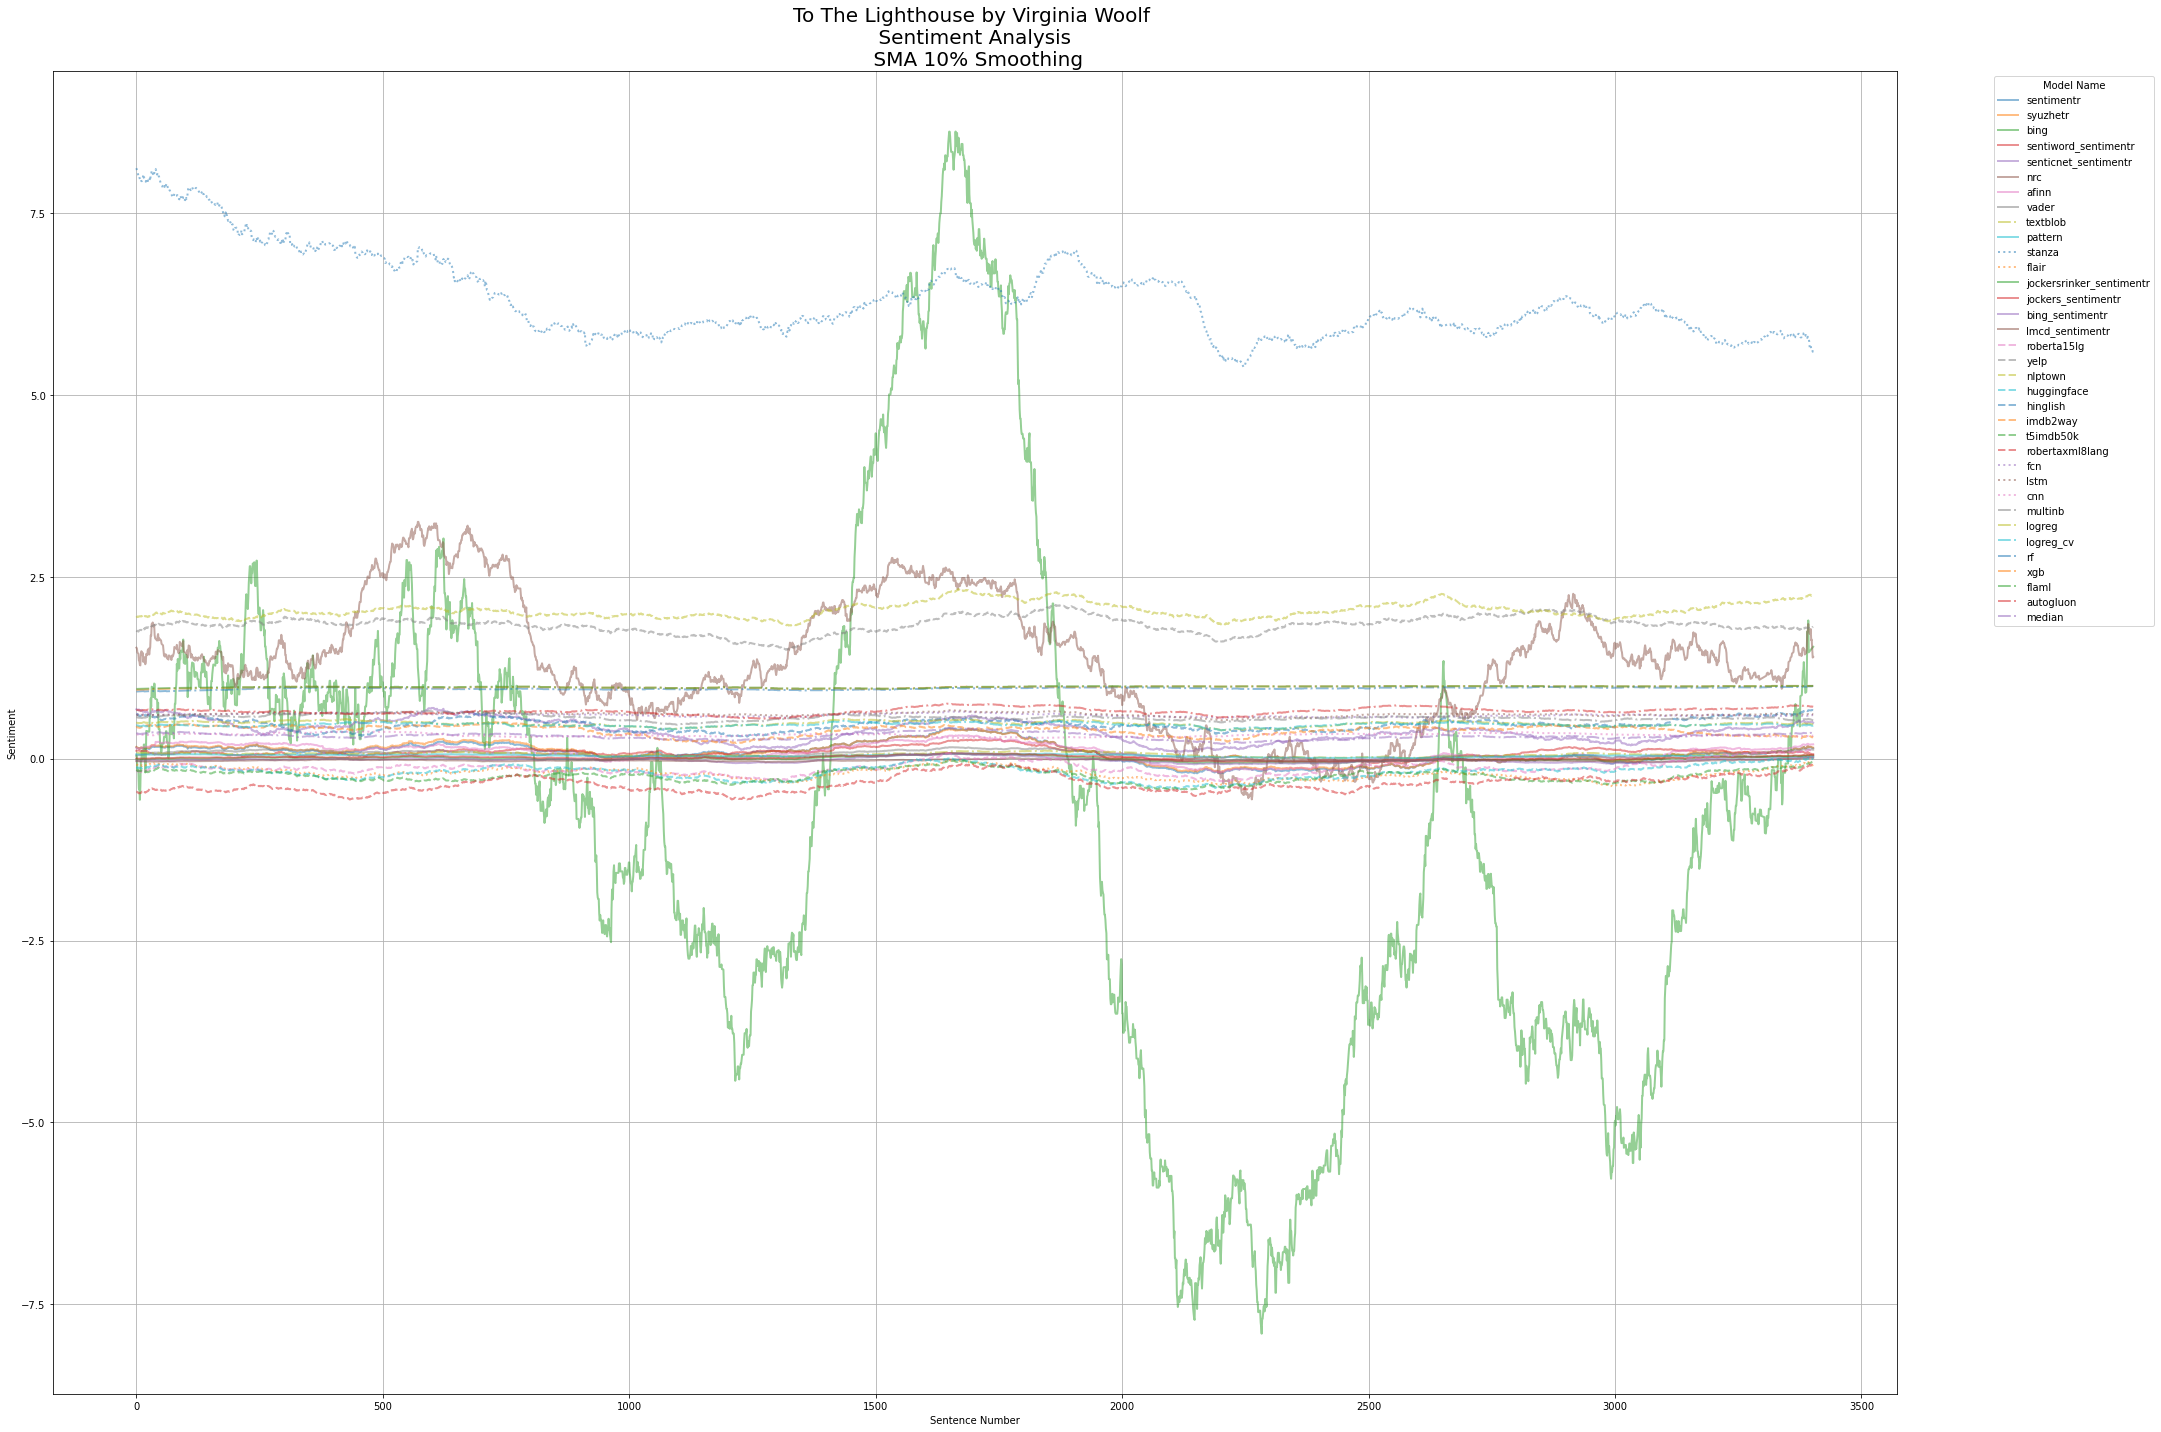

In [143]:
#@title Enter Rolling window size as a Percent of total Corpus Length

Window_Percent = 10 #@param {type:"slider", min:1, max:30, step:1}

win_size = int(Window_Percent/100 * ensemble_df.shape[0])

plt.figure(figsize=(30,20))

# If does not exist, calculate rolling mean (SMA)
if ~ensemble_df.columns.str.contains('_roll').any():
  for acol in cols_model_ls:
    acol_roll = f'{acol}_roll'
    ensemble_df[acol_roll] = ensemble_df[acol].rolling(win_size, center=True, min_periods=0).mean()

# cols_roll_ls = [x for x in ensemble_df.columns if x.endswith('_roll')]
for acol in cols_model_ls:
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_roll = f'{acol}_roll'
  ensemble_df[acol_roll].plot(alpha=0.5, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing', fontsize=20)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')
# plt.legend(title='Model Name', loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()
plt.show();

# Standardize the Smoothed Arcs

In [ ]:
# Plot raw values

for acol in cols_ls:
  ensemble_df[acol].plot(label=acol)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show();

In [144]:
# Select Standardized Method and Standardize all Model Values

#@title Select a Standardization Method
Model_Standardization_Method = "zScore" #@param ["zScore", "MinMax", "Robust"]
# Create Standardized versions of each Model/Column values
# CAUTION: Only run once

# Select a Standardization method = ['zscore','minmax','robust']
# Model_Standardization_Method = 'robust'

if Model_Standardization_Method == 'zScore':
  scaler = StandardScaler()
elif Model_Standardization_Method == 'MinMax':
  scaler = MinMaxScaler()
elif Model_Standardization_Method == 'Robust':
  scaler = RobustScaler()

# If does not exist, standardize the rolling mean (SMA)
if ~ensemble_df.columns.str.contains('_stdroll').any():
  for acol in cols_model_ls:
    acol_roll = f'{acol}_roll'
    acol_stdroll = f'{acol}_stdroll'
    ensemble_df[acol_stdroll] = scaler.fit_transform(ensemble_df[acol_roll].values.reshape(-1,1))

"""
for acol in cols_ls:
  acol_std = f'{acol}_std'
  # scaler.fit(ensemble_df[acol].values.reshape(-1,1))
  ensemble_df[acol_std] = scaler.fit_transform(ensemble_df[acol].values.reshape(-1,1))
""";

ensemble_df.head()

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,median,...,rf_roll,xgb_roll,flaml_roll,autogluon_roll,median_roll,sentimentr_stdroll,syuzhetr_stdroll,bing_stdroll,sentiword_sentimentr_stdroll,senticnet_sentimentr_stdroll,nrc_stdroll,afinn_stdroll,vader_stdroll,textblob_stdroll,pattern_stdroll,stanza_stdroll,flair_stdroll,jockersrinker_sentimentr_stdroll,jockers_sentimentr_stdroll,bing_sentimentr_stdroll,lmcd_sentimentr_stdroll,roberta15lg_stdroll,yelp_stdroll,nlptown_stdroll,huggingface_stdroll,hinglish_stdroll,imdb2way_stdroll,t5imdb50k_stdroll,robertaxml8lang_stdroll,fcn_stdroll,lstm_stdroll,cnn_stdroll,multinb_stdroll,logreg_stdroll,logreg_cv_stdroll,rf_stdroll,xgb_stdroll,flaml_stdroll,autogluon_stdroll,median_stdroll
0,0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1,1.626460,0.799107,0.846307,0.332184,yes of course if it is fine tomorrow said...,1,1,1,1,1,1,1,0.997788,...,0.923529,0.947059,0.958824,0.676471,0.352084,0.596736,0.566153,0.250652,0.373402,2.045032,0.208341,0.530281,-0.219206,1.051371,1.213605,3.228045,1.599421,-0.230685,-0.285582,-0.197449,-0.924459,-0.456533,-0.716645,-0.804583,0.702436,1.779047,0.880857,0.781575,-0.988365,0.455218,-0.523299,0.297297,-0.030209,0.177745,-0.548662,-3.050336,-3.281223,-2.624740,0.456600,0.984488
1,1,0,0,"""But you'll have to be up with the lark,"" she ...",0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1,0.680818,0.771381,0.850767,0.420182,but you will have to be up with the lark sh...,0,0,0,1,1,1,1,0.000000,...,0.923977,0.947368,0.959064,0.672515,0.350025,0.556795,0.525335,0.250593,0.381504,2.019302,0.197980,0.522760,-0.225460,1.031798,1.192349,3.183942,1.532853,-0.282843,-0.343446,-0.192707,-0.905007,-0.510052,-0.771410,-0.893699,0.649905,1.785299,0.757322,0.861734,-0.988138,0.518628,-0.472107,0.294650,0.038781,0.265152,-0.413746,-3.017918,-3.254304,-2.601903,0.369317,0.936584
2,2,1,0,To her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1,1.556802,0.590935,0.995762,0.371851,to her son these words conveyed an extraordina...,1,1,0,1,1,1,1,0.999898,...,0.924419,0.947674,0.959302,0.668605,0.346342,0.519389,0.487101,0.194421,0.398358,1.972788,0.131226,0.465694,-0.278275,0.895746,1.056648,3.130072,1.466771,-0.337738,-0.404207,-0.256450,-0.885782,-0.562678,-0.727112,-0.921458,0.597515,1.855582,0.642288,0.804802,-1.061740,0.475400,-0.545588,0.286246,0.106969,0.351541,-0.280398,-2.985878,-3.227698,-2.579332,0.283048,0.850891
3,3,1,0,"Since he belonged, even at the age of six, to ...",4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1,-1.373809,0.474658,0.994165,0.015341,since he belonged even at the age of six to ...,1,1,1,1,1,1,1,0.999900,...,0.924855,0.947977,0.959538,0.670520,0.344557,0.513297,0.480762,0.194688,0.395227,1.954231,0.121430,0.458634,-0.284115,0.877299,1.036545,3.093117,1.514717,-0.335926,-0.404390,-0.251422,-0.866779,-0.488202,-0.782590,-0.843840,0.637304,1.697171,0.690641,0.883900,-1.063259,0.462169,-0.522226,0.305027,0.017710,0.268113,-0.392362,-2.954208,-3.201399,-2.557021,0.325313,0.809356
4,4,1,0,It was fringed w

In [145]:
ensemble_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 110 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   sent_no                           int64  
 1   parag_no                          int64  
 2   sect_no                           int64  
 3   sent_raw                          object 
 4   sentimentr                        float64
 5   syuzhetr                          float64
 6   bing                              float64
 7   sentiword_sentimentr              float64
 8   senticnet_sentimentr              float64
 9   nrc                               float64
 10  afinn                             float64
 11  vader                             float64
 12  textblob                          float64
 13  pattern                           float64
 14  stanza                            float64
 15  flair                             float64
 16  jockersrinker_sentimentr          float64

## Save Checkpoint

In [ ]:
!pwd

In [ ]:
!ls

In [152]:
# Save

date_dt = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")

novel_title_str = Novel_Title[0].replace(' ', '_')

novel_name = '_'.join(novel_title_str.split())
novel_name = '_'.join(novel_name.split('.'))
novel_name = '_'.join(novel_name.split('__'))
file_out = f'sa_{novel_name.lower()}_{Model_Standardization_Method.lower()}_roll{Window_Percent}_{date_dt.lower()}.csv'
file_path = f'./data/sentiments_clean/{file_out}'
ensemble_df.to_csv(file_path)

print(f'Saved to file: {file_path}')

Saved to file: ./data/sentiments_clean/sa_to_the_lighthouse_by_virginia_woolf_zscore_roll10_2021_11_27-11_28_13_am.csv


In [ ]:
!ls -altr ./data/sentiments_clean/sa_*.csv

In [153]:
!head -n 10 $file_path

,sent_no,parag_no,sect_no,sent_raw,sentimentr,syuzhetr,bing,sentiword_sentimentr,senticnet_sentimentr,nrc,afinn,vader,textblob,pattern,stanza,flair,jockersrinker_sentimentr,jockers_sentimentr,bing_sentimentr,lmcd_sentimentr,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,fcn,lstm,cnn,sent_clean,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,median,sentimentr_roll,syuzhetr_roll,bing_roll,sentiword_sentimentr_roll,senticnet_sentimentr_roll,nrc_roll,afinn_roll,vader_roll,textblob_roll,pattern_roll,stanza_roll,flair_roll,jockersrinker_sentimentr_roll,jockers_sentimentr_roll,bing_sentimentr_roll,lmcd_sentimentr_roll,roberta15lg_roll,yelp_roll,nlptown_roll,huggingface_roll,hinglish_roll,imdb2way_roll,t5imdb50k_roll,robertaxml8lang_roll,fcn_roll,lstm_roll,cnn_roll,multinb_roll,logreg_roll,logreg_cv_roll,rf_roll,xgb_roll,flaml_roll,autogluon_roll,median_roll,sentimentr_stdroll,syuzhetr_stdroll,bing_stdroll,sentiword_sentimentr_stdroll,senticnet_sentimentr_stdr

# **Plot Sentiment Arcs**

In [154]:
ensemble_ls = ensemble_lexicon_ls + ensemble_heuristic_ls + ensemble_tradml_ls + \
              ensemble_dnn_ls + ensemble_transformer_ls

print(f'Confirm these are the all the Model(s) to include in the Ensemble:\n')

for i, amodel in enumerate(ensemble_ls):
  print(f'  Model #{i}: {amodel} ({models_dt[amodel][1]})')

print(f'\nIf there is an error in these {len(ensemble_ls)} models, \n go back and rerun the previous code cells.')

Confirm these are the all the Model(s) to include in the Ensemble:

  Model #0: SyuzhetR_AFINN (lexicon)
  Model #1: SyuzhetR_Bing (lexicon)
  Model #2: SyuzhetR_NRC (lexicon)
  Model #3: SyuzhetR_SyuzhetR (lexicon)
  Model #4: SentimentR_SentimentR (lexicon)
  Model #5: Pattern (lexicon)
  Model #6: VADER (heuristic)
  Model #7: SentimentR_Bing (heuristic)
  Model #8: SentimentR_SentiWord (heuristic)
  Model #9: SentimentR_SenticNet (heuristic)
  Model #10: SentimentR_LMcD (heuristic)
  Model #11: SentimentR_Jockers (heuristic)
  Model #12: SentimentR_JockersRinker (heuristic)
  Model #13: Logistic_Regression (tradml)
  Model #14: Logistic_Regression_CV (tradml)
  Model #15: Multinomial_Naive_Bayes (tradml)
  Model #16: TextBlob (tradml)
  Model #17: Random_Forest (tradml)
  Model #18: XGBoost (tradml)
  Model #19: FLAML_AutoML (tradml)
  Model #20: AutoGluon_Text (tradml)
  Model #21: Fully_Connected_Network (dnn)
  Model #22: LSTM_DNN (dnn)
  Model #23: CNN_DNN (dnn)
  Model #24: Mu

In [157]:
# models_dt[ensemble_ls]

models_name_ls = []

for i, amodel in enumerate(ensemble_ls):
  models_name_ls.append(models_dt[amodel][0])

models_name_ls.append('median')
models_name_ls

['afinn',
 'bing',
 'nrc',
 'syuzhetr',
 'sentimentr',
 'pattern',
 'vader',
 'bing_sentimentr',
 'sentiword_sentimentr',
 'senticnet_sentimentr',
 'lmcd_sentimentr',
 'jockers_sentimentr',
 'jockersrinker_sentimentr',
 'logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'lstm',
 'cnn',
 'stanza',
 'flair',
 'huggingface',
 't5imdb50k',
 'hinglish',
 'yelp',
 'imdb2way',
 'nlptown',
 'robertaxml8lang',
 'roberta15lg',
 'median']

In [158]:
ensemble_ls

['SyuzhetR_AFINN',
 'SyuzhetR_Bing',
 'SyuzhetR_NRC',
 'SyuzhetR_SyuzhetR',
 'SentimentR_SentimentR',
 'Pattern',
 'VADER',
 'SentimentR_Bing',
 'SentimentR_SentiWord',
 'SentimentR_SenticNet',
 'SentimentR_LMcD',
 'SentimentR_Jockers',
 'SentimentR_JockersRinker',
 'Logistic_Regression',
 'Logistic_Regression_CV',
 'Multinomial_Naive_Bayes',
 'TextBlob',
 'Random_Forest',
 'XGBoost',
 'FLAML_AutoML',
 'AutoGluon_Text',
 'Fully_Connected_Network',
 'LSTM_DNN',
 'CNN_DNN',
 'Multilingual_CNN_Stanza_AutoML',
 'HyperOpt_CNN_Flair_AutoML',
 'Distilled_BERT',
 'T5_IMDB',
 'BERT_Dual_Coding',
 'BERT_Yelp',
 'BERT_2IMDB',
 'BERT_Multilingual',
 'RoBERTa_XML_8Language',
 'RoBERTa_Large_15DB']

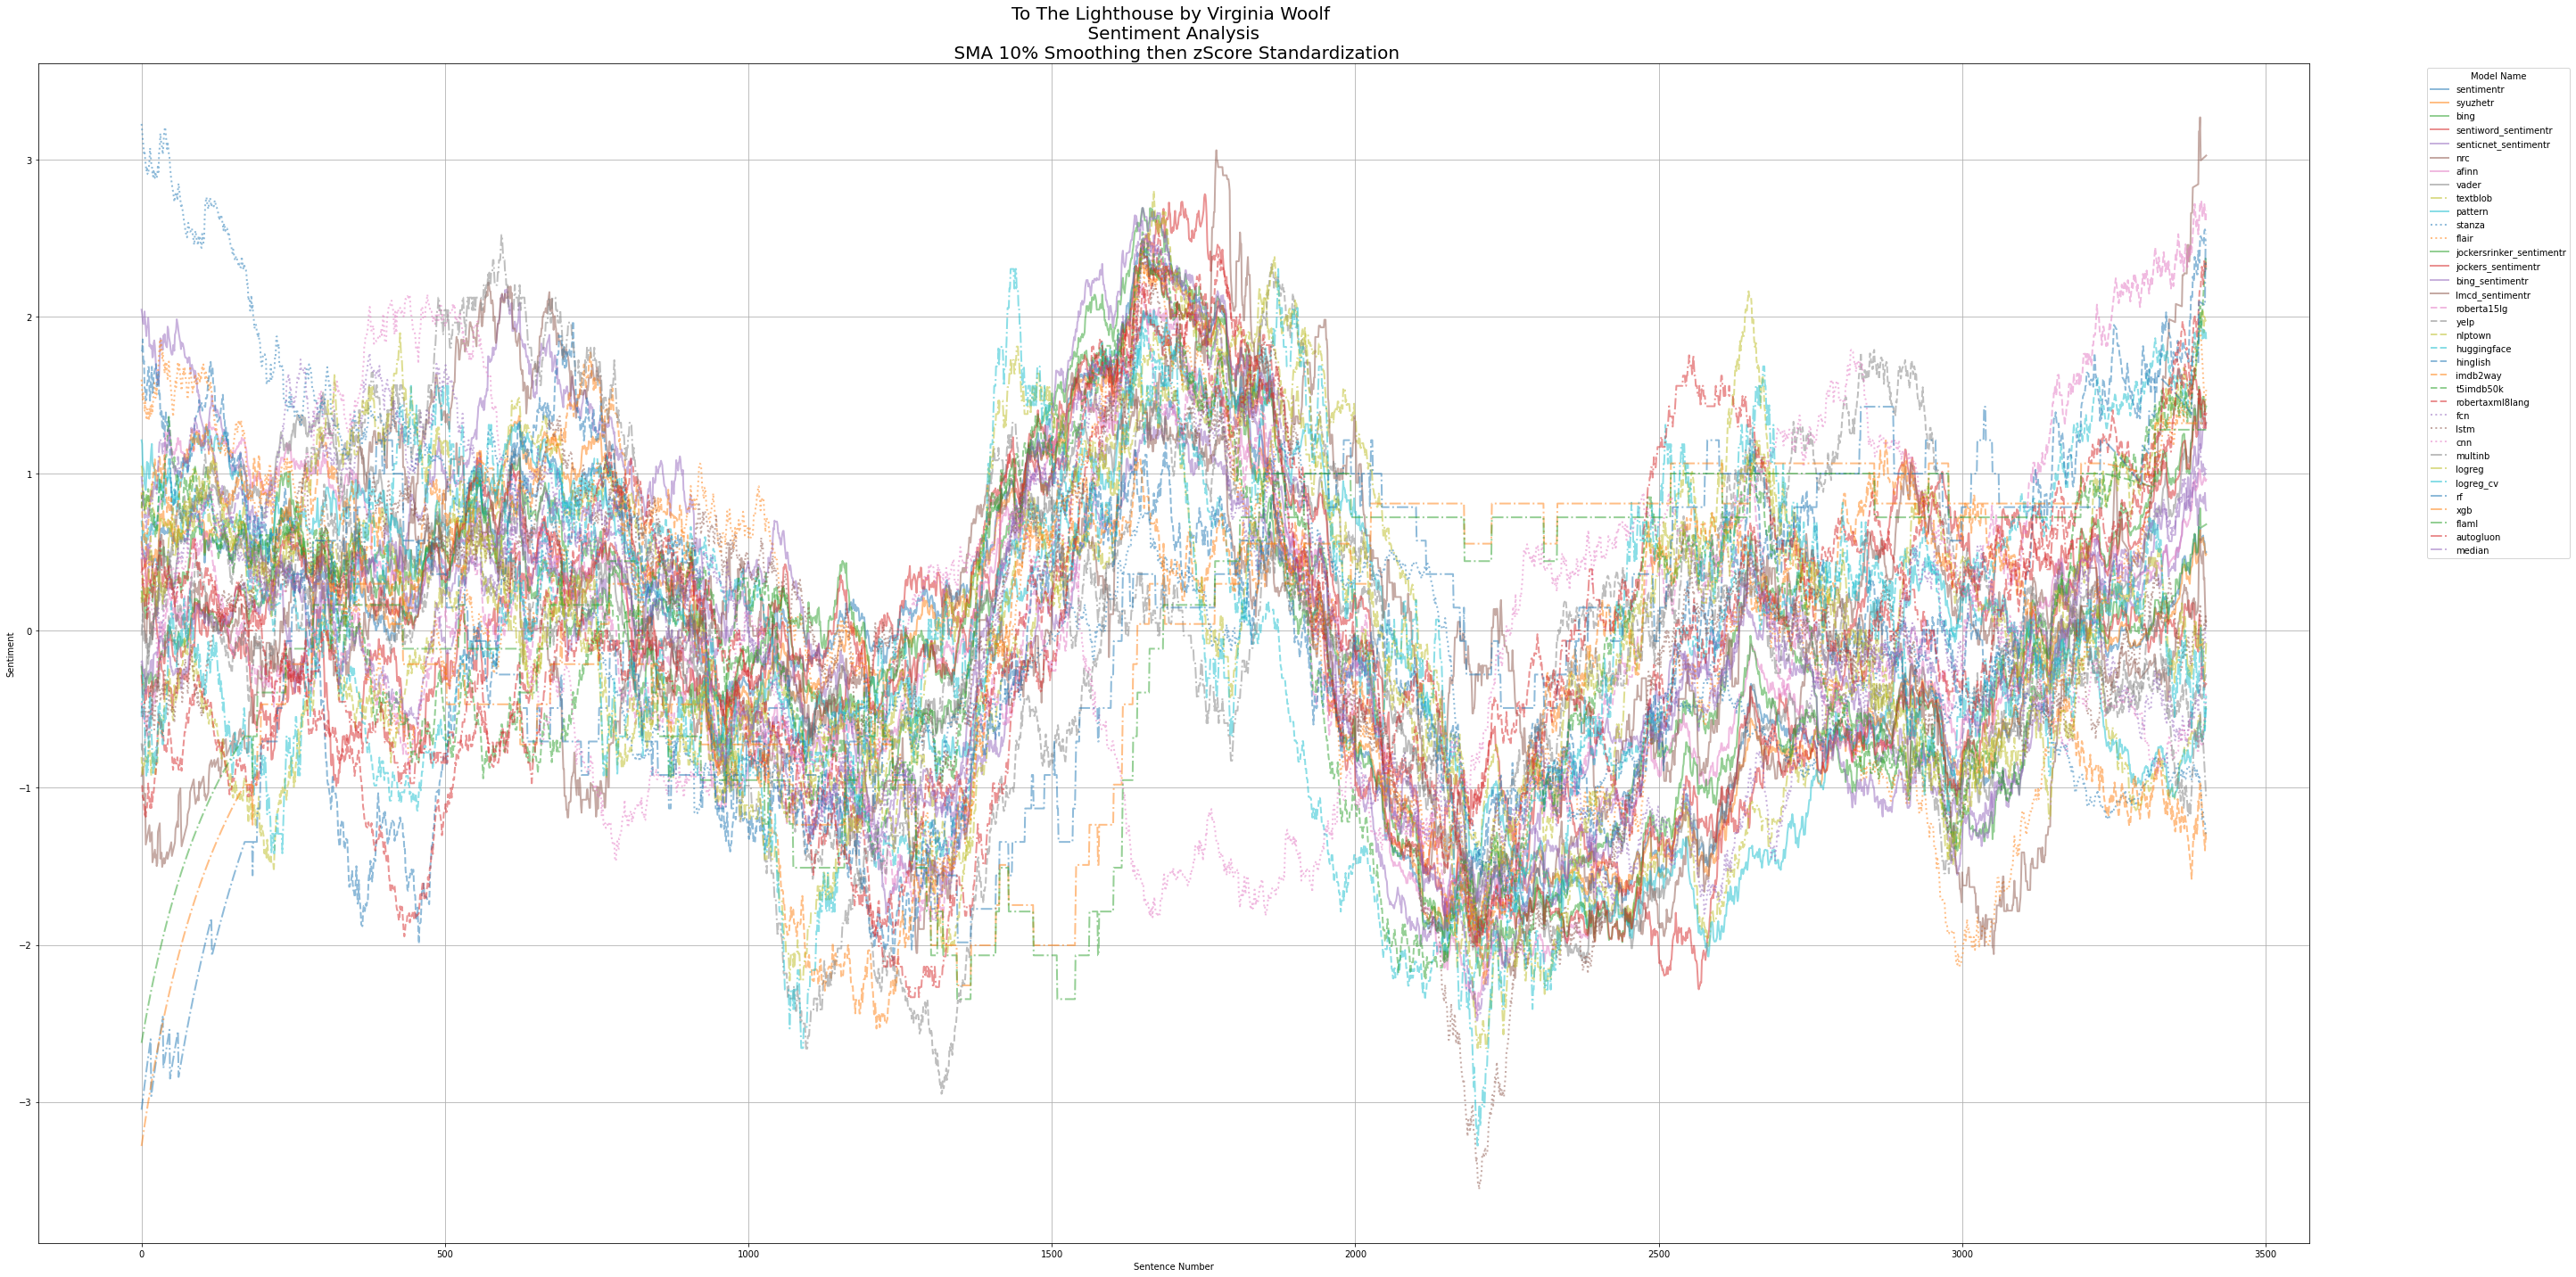

In [170]:
# Plot all the Smoothed then Standardized Models

plt.figure(figsize=(40,20))

# cols_stdroll_ls = [x for x in ensemble_df.columns if x.endswith('_stdroll')]

# cols_roll_ls = [x for x in ensemble_df.columns if x.endswith('_roll')]
for acol in cols_model_ls:
  if acol in models_lexicon_ls:
    alinestyle = 'solid'
  elif acol in models_heuristic_ls:
    alinestyle = 'solid'
  elif acol in models_tradml_ls:
    alinestyle = 'dashdot'
  elif acol in models_dnn_ls:
    alinestyle = 'dotted'
  elif acol in models_transformer_ls:
    alinestyle='dashed'

  acol_stdroll = f'{acol}_stdroll'
  ensemble_df[acol_stdroll].plot(alpha=0.5, label=acol, linewidth=2, linestyle=alinestyle)

plt.grid(True)
plt.title(f'{Novel_Title[0]} \n Sentiment Analysis \n SMA {Window_Percent}% Smoothing then {Model_Standardization_Method} Standardization', fontsize=20)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment')
# plt.legend(title='Model Name', loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Model Name')
plt.tight_layout()
plt.show();


# **Get SentimentArcs Metrics and Plot**

# **END OF NOTEBOOK**